In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# International vs Domestic

As seen in the tables, the Mexican league is the most diverse of all the leagues with less than a 50% of players claiming Mexican nationality. On the contrary, the Argentinian and Brazilian leagues are primarily comprised of national players while still having more overall players than the Liga MX

EDA Objectives:
    * Nationality composition in each league
    * Nationality composition in each team
    - Do Diverse teams perform better?
    - Most valueable player by nationality

## Section 1: Nationalities by Team

In [2]:
def get_starting_11(players):
    #get names of teams
    teams = players.Squad.unique()
    #clean minutes column
    players.Min = players.Min.fillna(0).astype(int)
    top11 = pd.DataFrame()
    #for each team, get the top 11 players in total minutes played
    for team in teams:
        team11 = players[players.Squad == team].sort_values('Min', ascending=False).iloc[0:11, :]
        top11 = top11.append(team11)
    return top11
#get_starting_11(mex_pla)

In [7]:
#Team Diversity

#Mexico
mex_pla = pd.read_csv('mex_players.txt')
mex_pla.columns = mex_pla.iloc[0].values
mex_pla = mex_pla.drop(0)
mex_pla = mex_pla.set_index('Rk')
mex_pla.Player = mex_pla.Player.apply(lambda x: x.split("\\")[0]) 
mex_pla.Nation = mex_pla.Nation.apply(lambda x: x.split(" ")[1]) 
top11_mex = get_starting_11(mex_pla)
mex_squad_nation = mex_pla.groupby(['Squad', 'Nation']).apply(len)
teams = pd.unique(mex_squad_nation.index.get_level_values(0))
values = np.array([])
non_domestic_mex = np.array([])
for team in teams:
    domestic = mex_squad_nation[team]['MEX']
    non_domestic_mex = np.append(mex_squad_nation[team].sum() - domestic, non_domestic_mex) 
    values = np.append(mex_squad_nation[team].size, values)
values

mex_team_nats = pd.DataFrame({'Squad' : teams,
              'Nations' : values,
              'Non-Domestic': non_domestic_mex})

mex_table = pd.read_csv('mex_table.txt')
mex_table = mex_table[['Rk', 'Squad']]
mex_team_nats = mex_table.merge(mex_team_nats, 'inner', 'Squad')

#Argentina
arg_pla = pd.read_csv('arg_players.txt')
arg_pla.columns = arg_pla.iloc[0].values
arg_pla = arg_pla.drop(0)
arg_pla = arg_pla.set_index('Rk')
arg_pla.Player = arg_pla.Player.apply(lambda x: x.split("\\")[0]) 
arg_pla.Nation = arg_pla.Nation.apply(lambda x: x.split(" ")[1]) 
top11_arg = get_starting_11(arg_pla)
arg_squad_nation = top11_arg.groupby(['Squad', 'Nation']).apply(len)
teams = pd.unique(arg_squad_nation.index.get_level_values(0))
values = np.array([])
non_domestic_arg = np.array([])
for team in teams:
    domestic = arg_squad_nation[team]['ARG']
    non_domestic_arg = np.append(arg_squad_nation[team].sum() - domestic, non_domestic_arg) 
    values = np.append(arg_squad_nation[team].size, values)
values

arg_team_nats = pd.DataFrame({'Squad' : teams,
              'Nations' : values,
              'Non-Domestic': non_domestic_arg})
arg_table = pd.read_csv('arg_table.txt')
arg_table = arg_table[['Rk', 'Squad']]
arg_team_nats = arg_table.merge(arg_team_nats, 'inner', 'Squad')

#Brazil
bra_pla = pd.read_csv('bra_players.txt')
bra_pla.columns = bra_pla.iloc[0].values
bra_pla = bra_pla.drop(0)
bra_pla = bra_pla.set_index('Rk')
bra_pla.Player = bra_pla.Player.apply(lambda x: x.split("\\")[0]) 
bra_pla.Nation = bra_pla.Nation.apply(lambda x: x.split(" ")[1]) 
top11_bra = get_starting_11(bra_pla)
bra_squad_nation = bra_pla.groupby(['Squad', 'Nation']).apply(len)
teams = pd.unique(bra_squad_nation.index.get_level_values(0))
values = np.array([])
non_domestic_bra = np.array([])
for team in teams:
    domestic = bra_squad_nation[team]['BRA']
    non_domestic_bra = np.append(bra_squad_nation[team].sum() - domestic, non_domestic_bra) 
    values = np.append(bra_squad_nation[team].size, values)
values

bra_team_nats = pd.DataFrame({'Squad' : teams,
              'Nations' : values,
              'Non-Domestic': non_domestic_bra})
bra_table = pd.read_csv('bra_table.txt')
bra_table = bra_table[['Rk', 'Squad']]
bra_team_nats = bra_table.merge(bra_team_nats, 'inner', 'Squad')


display(mex_team_nats)
display(arg_team_nats)
display(bra_team_nats)

,Rk,Squad,Nations,Non-Domestic
0,1,Santos,12.0,14.0
1,2,León,6.0,16.0
2,3,UANL,10.0,12.0
3,4,Querétaro,5.0,12.0
4,5,Necaxa,4.0,11.0
5,6,América,10.0,17.0
6,7,Morelia,8.0,13.0
7,8,Monterrey,9.0,14.0
8,9,Pachuca,7.0,14.0
9,10,Guadalajara,6.0,15.0


,Rk,Squad,Nations,Non-Domestic
0,1,Boca Juniors,2.0,1.0
1,2,River Plate,2.0,2.0
2,3,Vélez Sarsf,2.0,1.0
3,4,Racing Club,1.0,0.0
4,5,Argentinos Jun,2.0,1.0
5,6,Defensa y Just,3.0,3.0
6,7,Lanús,4.0,4.0
7,8,San Lorenzo,3.0,2.0
8,9,Rosario Cent,3.0,2.0
9,10,Newell's OB,3.0,2.0


,Rk,Squad,Nations,Non-Domestic
0,1,Flamengo,4.0,4.0
1,2,Santos,3.0,3.0
2,3,Palmeiras,2.0,1.0
3,4,Grêmio,5.0,6.0
4,5,Atl Paranaense,4.0,4.0
5,6,São Paulo,7.0,7.0
6,7,Internacional,4.0,3.0
7,8,Corinthians,2.0,1.0
8,9,Fortaleza,2.0,1.0
9,10,Goiás,1.0,0.0


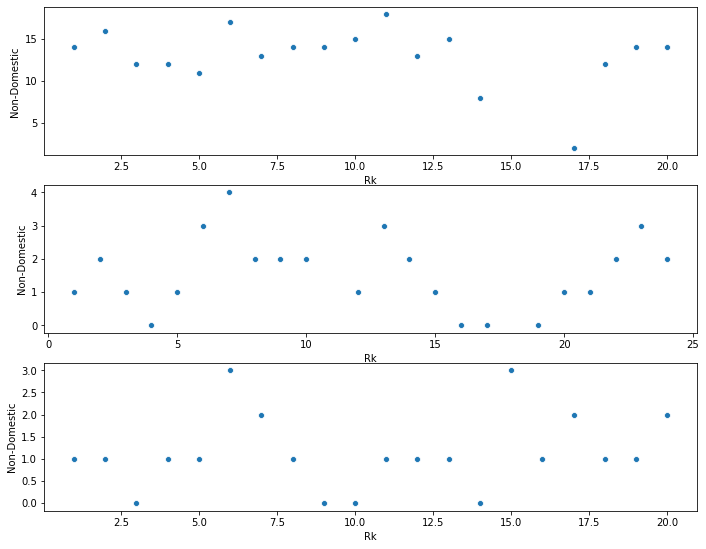

In [4]:
f, axes = plt.subplots(3, 1)

f.set_size_inches(11.7, 9.27)

sns.scatterplot('Rk', 'Non-Domestic', data= mex_team_nats, ax=axes[0])
sns.scatterplot('Rk', 'Non-Domestic', data= arg_team_nats, ax=axes[1])
sns.scatterplot('Rk', 'Non-Domestic', data= bra_team_nats, ax=axes[2])

#### Section 2: Nationalities by League

In [5]:
#League nationalities
mex_nat = pd.read_csv('mex_nat.txt')
arg_nat = pd.read_csv('arg_nat.txt')
bra_nat = pd.read_csv('bra_nat.txt')

#Mexico
mex_mins = mex_nat.Min.sum()

mex_nat.Nation = mex_nat.Nation.apply(lambda x: " ".join(x.split()[1:]))
mex_nat['Percent'] = mex_nat.Min.apply(lambda x: x / mex_mins)
display(mex_nat.set_index('Rk').dropna())
#Argentina
arg_mins = arg_nat.Min.sum()

arg_nat.Nation = arg_nat.Nation.apply(lambda x: " ".join(x.split()[1:]))
arg_nat['Percent'] = arg_nat.Min.apply(lambda x: x / arg_mins)
display(arg_nat.set_index('Rk'))
#Brazil
bra_mins = bra_nat.Min.sum()

bra_nat.Nation = bra_nat.Nation.apply(lambda x: " ".join(x.split()[1:]))
bra_nat['Percent'] = bra_nat.Min.apply(lambda x: x / bra_mins)
bra_nat.set_index('Rk')

,Nation,# Players,Min,List,Percent
Rk,,,,,
1,Mexico,364,242137.0,José Juan Macías Luis Montes Alan Pulido Luis ...,0.487926
2,Argentina,74,82860.0,Mauro Quiroga Nicolás Ibáñez Rogelio Funes Mor...,0.166970
3,Colombia,37,40085.0,Felipe Pardo Fabián Castillo Óscar Murillo Cam...,0.080775
4,Uruguay,29,27326.0,Brian Lozano Jonathan Rodríguez Fernando Gorri...,0.055064
5,Chile,21,24286.0,Jean Meneses Juan Delgado Claudio Baeza Sebast...,0.048938
6,Ecuador,21,21954.0,Ángel Mena Miller Bolaños Jefferson Intriago E...,0.044239
7,Paraguay,17,21228.0,Dario Lezcano Carlos González Espínola Osvaldo...,0.042776
8,Brazil,9,9268.0,William da Silva Dória Rafael Carioca Camilo S...,0.018676
9,United States,9,3604.0,Ventura Alvarado Sebastián Saucedo Fernando Ar...,0.007262


,Nation,# Players,Min,List,Percent
Rk,,,,,
1,Argentina,738,538019,Lisandro López Luis Miguel Rodríguez Gabriel C...,0.839355
2,Uruguay,46,36370,Diego Zabala Santiago García Leonardo Burián S...,0.056740
3,Paraguay,33,27993,Matías Rojas Diego Viera Saúl Salcedo Pablo Pa...,0.043671
4,Colombia,31,18109,Yeimar Gómez Andrade Iván Arboleda Rafael Borr...,0.028252
5,Chile,11,9729,Alfonso Parot Eugenio Mena Gabriel Arias Pablo...,0.015178
6,Venezuela,4,1191,Jan Carlos Hurtado Samuel Sosa Jesús Vargas An...,0.001858
7,Peru,3,2772,Luis Abram Miguel Araujo Alexi Gómez,0.004325
8,Ecuador,2,2357,Fernando Gaibor Alexander Domínguez,0.003677
9,Armenia,2,776,Norberto Briasco Mauro Guevgeozián,0.001211


,Nation,# Players,Min,List,Percent
Rk,,,,,
1,Brazil,754,673958,Gabriel Barbosa Bruno Henrique Dudu Eduardo Sa...,0.898327
2,Argentina,19,20358,Víctor Cuesta Jonathan David Gómez Joel Carli ...,0.027135
3,Colombia,17,16999,Yony González Juan Quintero Oswaldo Henríquez ...,0.022658
4,Paraguay,11,11525,Gatito Fernández Richard Franco Gustavo Gómez ...,0.015362
5,Uruguay,9,9849,Carlos Sánchez Giorgian De Arrascaeta Leandro ...,0.013128
6,Peru,4,2612,Paolo Guerrero Miguel Trauco Christian Cueva N...,0.003482
7,Ecuador,3,5693,Robert Arboleda Juan Cazares Junior Sornoza,0.007588
8,Venezuela,3,4663,Yeferson Soteldo Rómulo Otero Alejandro Guerra,0.006215
9,Spain,2,3142,Pablo Marí Juanfran,0.004188
